#### Barra模型初探，A股市场风格解析

**研究目的**

本篇内容是参考方正金工研究报告“星火” 多因子系列报告的第一篇《Barra模型初探，A股市场风格解析》，主要对Barra模型的基本原理进行介绍，对模型的细节部分进行说明，试图构建多因子收益归因模型，并利用风险收益模型对A股市场的风格进行解析，探讨 Barra 模型在 A 股市场上的用武之地。

**内容分布**

- 1.模型介绍
    - 1-1.多因子模型介绍
    - 1-2.因子标准化
    - 1-3.加权最小二乘法
    - 1-4.barra风险收益归因模型介绍
- 2.市场主流因子介绍
    - 2-1.因子值计算存储
    - 2-2.因子值处理（加入收益）
- 3.因子收益率计算
    - 3-1.进行因子收益计算
    - 3-2.因子收益统计分析
- 4.组合收益归因
    - 4-1.构建组合统计收益
    - 4-2.组合收益分解

##############################################################

**多因子模型介绍**

多因子模型的基础理论认为：股票的收益是由一些共同的因子来驱动的，不能被这些因子解释的部分被称为股票的“特质收益率”， 而每支股票的特质收益率之间是互不相关的。那关于这些共同的因子，和股票收益的关系，可以参考下面的内容

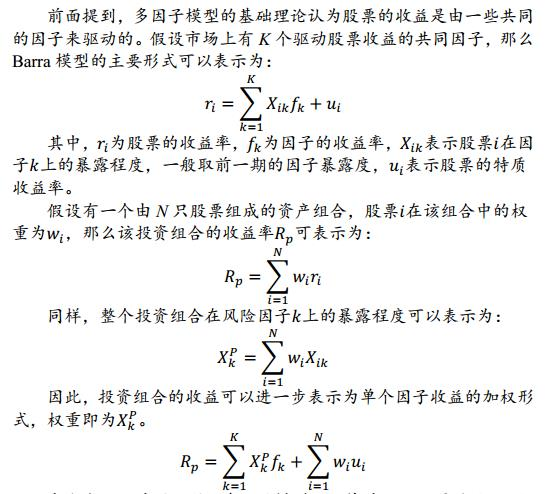

**结构化因子风险模型的作用**

风险因子也称为贝塔因子，和 Alpha 因子不同， 风险因子的风险溢价在时间序列上的均值绝对值可以很小，用这个因子来做选股长期可能没有明显超额收益，但在月度横截面上风险因子可以影响显著影响股票收益，方向可正可负。


因子收益率波动大，控制组合对风险因子的风险暴露，可以提升组合收益的稳定性。同时，通过因子暴露和因子收益率的计算，分析投资组合历史和当前的风险风险暴露，可以进行收益分析。


在组合优化方面，传统样本协方差矩阵估计方法在股票数量较多时，矩阵可能不满秩或者矩阵条件数
太大，无法直接用于组合优化过程。结构化因子风险模型通过降维的方式减小了股票收益率协方差矩阵的估计误差，便于风险预测。
下面看下处理的一些细节

**因子标准化**

由于不同因子在数量级上存在差别， 在实际回归中需要对单个因子在横截面上进行标准化， 从而得到均值为 0、标准差为 1 的标准化因子，这里需要特别注意一下的是，为保证全市场基准指数对每个风格因子的暴露程度均为 0，我们需要对每个因子减去其市值加权均值，再除以其标准差，计算方法如下
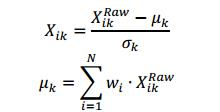
考虑一个由市值加权构成的投资组合， 可以通过如下验证看出，该投资组合对于任意因子的暴露度均为0。
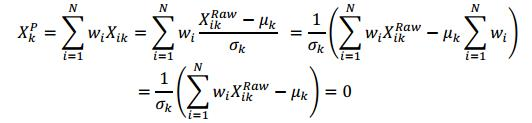

**加权最小二乘法**

前面提到，在 Barra 模型中我们假设每只股票的特质收益率互不相关，但是每只股票的特质收益率列的方差并不相同，这就导致了回归模型出现异方差性。为解决这一问题，可以采用加权最小二乘WLS 方法进行回归，对不同的股票赋予不同的权重。
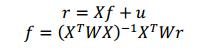
股票特质收益率方差通常与股票的市值规模成反比，即大市值股票的特质收益率方差通常较小，因此在这里的回归公式中，我们将以市值的平方根占比作为每只股票的回归权重，将其带入公式进行计算，然后在我们实际计算的过程中，由于X为奇异矩阵，并不能顺利求出收益率f，于是我们采用下面的方法进行处理

**风险收益模型介绍**

这里先来看下在USE4版本的barra模型下，收益表达式
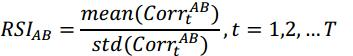
截距项因子的加入导致自变量因子之间存在多
重共线性， 因此因子的拟合无法直接通过解析解求得，模型的求解转变成一个带约束条件的加权最小二乘法求解：
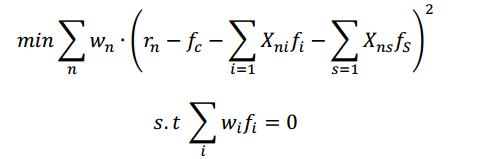
注意， 此处w是指单只股票 n 的市值权重，而w表示的是行业i内所有股票的市值占全体样本股票市值的比例。

**市场风格因子**

基于研报中对 Barra 模型框架构建及求解过程的介绍， 我们参考并构建多因子风险收益归因模型， 并将其运用到 A 股市场上， 从截距项、行业收益、风格收益三方面验证模型正确性， 观察市场风格的变化及投资组合的风险收益来源。

这里我们选取的风格因子可以通过聚宽因子库，风格因子获取，具体字段及说明如下
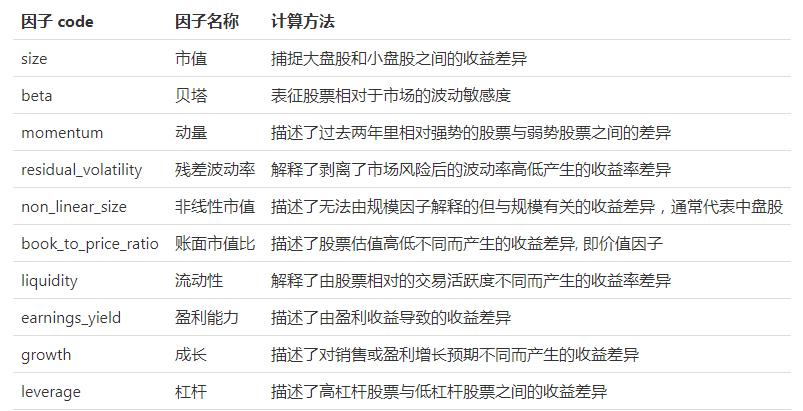

风格因子获取地址：
https://www.joinquant.com/help/api/help?name=factor_values#%E9%A3%8E%E6%A0%BC%E5%9B%A0%E5%AD%90

此处我们采用以上因子作为模型的解释变量，进行下面的研究。


选 定 2016.6.1-2019.6.3 为 样 本 考 察 期 间 ， 以 中 证 500指数（000905.XSHG） 成分股为考察样本，对市场风格因子的表现进行实证研究，在实际计算中还需对数据进行如下处理：

- 1） 剔除上市时间小于63天的股票；
- 2） 剔除标记为ST、*ST的股票；
- 3） 剔除任意因子为 NaN 的股票；

参考研报中为避免回归模型中自变量之间产生多重共线性的情况，而引入相关强度指标RSI，对各风格因子之间的相关程度进行检查，该指标的构造方法如下
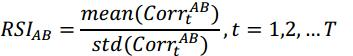


其中，corr 是指在截面 t 期，所有股票的 A、 B 因子之间的相关系数。类似于绩效评价中的信息比率 IC_IR，RSI指标 综合考虑了因子的平均相关系数以及相关系数的稳定性大小，下面的计算中有展示2016年到2019年期间各风格因子之间的相关强度，其中市值因子与杠杆因子之间、残差波动率因子与流动性因子之间存在较强的正相关关系；而市值因子与非线性市值因子之间、杠杆因子与非线性市值之间存在较强的负相关关系。


In [1]:
# 风险及免责提示：该策略由聚宽用户在聚宽社区分享，仅供学习交流使用。
# 原文一般包含策略说明，如有疑问请到原文和作者交流讨论。
# 原文网址：https://www.joinquant.com/view/community/detail/20580
# 标题：Barra模型初探，A股市场风格解析
# 工具包、工具函数
#工具函数
import time
from datetime import datetime, timedelta
from jqdata import *
import numpy as np
import pandas as pd
import math
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
from scipy import stats
from jqfactor import *
from scipy.optimize import minimize
import warnings  
warnings.filterwarnings('ignore') 

#设置画图样式
plt.style.use('ggplot')

#获取日期列表
def get_tradeday_list(start,end,frequency=None,count=None):
    if count != None:
        df = get_price('000001.XSHG',end_date=end,count=count)
    else:
        df = get_price('000001.XSHG',start_date=start,end_date=end)
    if frequency == None or frequency =='day':
        return df.index
    else:
        df['year-month'] = [str(i)[0:7] for i in df.index]
        if frequency == 'month':
            return df.drop_duplicates('year-month').index
        elif frequency == 'quarter':
            df['month'] = [str(i)[5:7] for i in df.index]
            df = df[(df['month']=='01') | (df['month']=='04') | (df['month']=='07') | (df['month']=='10') ]
            return df.drop_duplicates('year-month').index
        elif frequency =='halfyear':
            df['month'] = [str(i)[5:7] for i in df.index]
            df = df[(df['month']=='01') | (df['month']=='06')]
            return df.drop_duplicates('year-month').index 

def ShiftTradingDay(date,shift):
    # 获取所有的交易日，返回一个包含所有交易日的 list,元素值为 datetime.date 类型.
    tradingday = get_all_trade_days()
    # 得到date之后shift天那一天在列表中的行标号 返回一个数
    date = datetime.date(int(str(date)[:4]),int(str(date)[5:7]),int(str(date)[8:10]))
    shiftday_index = list(tradingday).index(date)+shift
    # 根据行号返回该日日期 为datetime.date类型
    return tradingday[shiftday_index] 

#进行新股、St股过滤，返回筛选后的股票
#！！！不能过滤停牌股票
def filter_stock(stockList,date,days=21*3,limit=0):#日频策略加入开盘涨停过滤
    
    #去除上市距beginDate不足3个月的股票
    def delect_stop(stocks,beginDate,n=days):
        stockList=[]
        beginDate = datetime.datetime.strptime(beginDate, "%Y-%m-%d")
        for stock in stocks:
            start_date=get_security_info(stock).start_date
            if start_date<(beginDate-datetime.timedelta(days=n)).date():
                stockList.append(stock)
        return stockList
    
    #剔除ST股
    st_data=get_extras('is_st',stockList, count = 1,end_date=date)
    stockList = [stock for stock in stockList if not st_data[stock][0]]

    #新股及退市股票
    stockList=delect_stop(stockList,date)
    
    #剔除开盘涨停股票
    if limit == 1:
        #如果需要收盘涨跌停可以改字段即可
        df = get_price(stockList,end_date=date,fields=['open','high_limit','low_limit'],count=1).iloc[:,0,:]
        df['h_limit']=(df['open']==df['high_limit'])
        df['l_limit']=(df['open']==df['low_limit'])
        stockList = [df.index[i] for i in range(len(df)) if not (df.h_limit[i] or df.l_limit[i])] #过滤涨跌停股票
    return stockList

#为股票池添加行业标记,return df格式 ,为中性化函数的子函数   
def get_industry_exposure(stock_list,date):
    df = pd.DataFrame(index=get_industries(name='sw_l1').index, columns=stock_list)
    for stock in stock_list:
        try:
            df[stock][get_industry_code_from_security(stock,date=date)] = 1
        except:
            continue
    return df.fillna(0)#将NaN赋为0

#查询个股所在行业函数代码（申万一级） ,为中性化函数的子函数    
def get_industry_code_from_security(security,date=None):
    industry_index=get_industries(name='sw_l1').index
    for i in range(0,len(industry_index)):
        try:
            index = get_industry_stocks(industry_index[i],date=date).index(security)
            return industry_index[i]
        except:
            continue
    return u'未找到'    


In [2]:
#初始设置

#设置统计数据区间
index = '000905.XSHG' #设置股票池，和对比基准，这里是中证500

#设置统计起止日期
date_start = '2016-06-01'
date_end   = '2019-06-04'

#设置调仓频率
trade_freq = 'month' #month每个自然月；day每个交易日；输入任意数字如 5，则为5日调仓 

#获取调仓时间列表
if trade_freq == 'month':  
    #获取交易日列表，每月首个交易日
    date_list = get_tradeday_list(start=date_start,end=date_end,frequency='month',count=None) #自然月的第一天
elif trade_freq == 'day': 
    date_list = get_tradeday_list(start=date_start,end=date_end,count=None)#获取回测日期间的所有交易日
else:
    date_day_list = get_tradeday_list(start=date_start,end=date_end,count=None)#获取回测日期间的所有交易日
    date_list = [date_day_list[i] for i in range(len(date_day_list)) if i%int(trade_freq) == 0]

In [3]:
date_list

DatetimeIndex(['2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-10', '2016-11-01', '2016-12-01', '2017-01-03',
               '2017-02-03', '2017-03-01', '2017-04-05', '2017-05-02',
               '2017-06-01', '2017-07-03', '2017-08-01', '2017-09-01',
               '2017-10-09', '2017-11-01', '2017-12-01', '2018-01-02',
               '2018-02-01', '2018-03-01', '2018-04-02', '2018-05-02',
               '2018-06-01', '2018-07-02', '2018-08-01', '2018-09-03',
               '2018-10-08', '2018-11-01', '2018-12-03', '2019-01-02',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-06',
               '2019-06-03'],
              dtype='datetime64[ns]', freq=None)

In [25]:
#通过聚宽因子获取barra风险因子值进行记录
def get_barra_factor(stock_list,date):
    #聚宽风险因子获取
    factor_name = ['size','beta','momentum','residual_volatility','non_linear_size','book_to_price_ratio','liquidity','earnings_yield','growth','leverage']
    factor_data = get_factor_values(securities=stock_list, factors = factor_name
            ,end_date=end_date,count=1)
    df = pd.DataFrame()
    for f in factor_name:
        temp_df = pd.DataFrame(factor_data[f]).T
        df = pd.concat([df,temp_df],axis=1)
    df.columns=factor_name
    return df

#进行因子值计算
factor_data_dict = {}

#循环时间列表获取原始因子数据组成dict
for end_date in date_list[:]:
    end_date=str(end_date)[:10]
    print('正在计算 {} 因子数据......'.format(end_date))
    stocks_list = get_index_stocks(index,date=end_date)
    factor_data_dict[end_date] = get_barra_factor(stocks_list,end_date)
factor_data_dict[end_date].head(3)

正在计算 2016-06-01 因子数据......
正在计算 2016-07-01 因子数据......
正在计算 2016-08-01 因子数据......
正在计算 2016-09-01 因子数据......
正在计算 2016-10-10 因子数据......
正在计算 2016-11-01 因子数据......
正在计算 2016-12-01 因子数据......
正在计算 2017-01-03 因子数据......
正在计算 2017-02-03 因子数据......
正在计算 2017-03-01 因子数据......
正在计算 2017-04-05 因子数据......
正在计算 2017-05-02 因子数据......
正在计算 2017-06-01 因子数据......
正在计算 2017-07-03 因子数据......
正在计算 2017-08-01 因子数据......
正在计算 2017-09-01 因子数据......
正在计算 2017-10-09 因子数据......
正在计算 2017-11-01 因子数据......
正在计算 2017-12-01 因子数据......
正在计算 2018-01-02 因子数据......
正在计算 2018-02-01 因子数据......
正在计算 2018-03-01 因子数据......
正在计算 2018-04-02 因子数据......
正在计算 2018-05-02 因子数据......
正在计算 2018-06-01 因子数据......
正在计算 2018-07-02 因子数据......
正在计算 2018-08-01 因子数据......
正在计算 2018-09-03 因子数据......
正在计算 2018-10-08 因子数据......
正在计算 2018-11-01 因子数据......
正在计算 2018-12-03 因子数据......
正在计算 2019-01-02 因子数据......
正在计算 2019-02-01 因子数据......
正在计算 2019-03-01 因子数据......
正在计算 2019-04-01 因子数据......
正在计算 2019-05-06 因子数据......
正在计算 2019-06-03 因子数据......


,size,beta,momentum,residual_volatility,non_linear_size,book_to_price_ratio,liquidity,earnings_yield,growth,leverage
code,,,,,,,,,,
000006.XSHE,-0.821249,0.846139,-0.654765,-1.122607,1.350697,0.721450,-0.347607,0.737268,0.001635,-0.645989
000008.XSHE,-0.672643,0.236866,-1.180368,-0.510980,1.309040,0.234178,-0.036523,-0.979308,-0.049531,-1.181356
000009.XSHE,-0.613574,1.604815,-0.118106,-0.391928,1.261747,-0.572879,0.289326,0.708174,0.526176,-0.132690


In [28]:
#数据清洗、包括去极值、标准化、中性化等,并加入y值
import time  
t1 = time.time()
factor_data_y_dict = {}
for date_1,date_2 in zip(date_list[:-1],date_list[1:]):
    d1 = ShiftTradingDay(date_1,1) #往后推一天
    d2 = ShiftTradingDay(date_2,1)
    print('开始整理 {} 数据...'.format(str(date_1)[:10]))
    factor_df = factor_data_dict[str(date_1)[:10]] #根据字典存储的日期格式不同进行不同设置
    #factor_df = factor_data_dict[date_1] #根据字典存储的日期格式不同进行不同设置
    #factor_df.index = [normalize_code('0'*(6-len(str(i)))+str(i)) for i in factor_df.index] #股票代码处理
    pool = list(factor_df.index)
    pool = filter_stock(pool,str(d1)[:10],days=21*3) #进行新股、ST股票过滤
    
    #计算指数涨跌幅
    df_1 = get_price(index,end_date=d1,fields=['open'],count = 1)['open']
    df_2 = get_price(index,end_date=d2,fields=['open'],count = 1)['open']
    index_pct = df_2.values[0]/df_1.values[0] - 1#具体数值
    
    #计算各股票涨跌幅
    df_1 = get_price(pool,end_date=d1,fields=['open'],count = 1)['open']
    df_2 = get_price(pool,end_date=d2,fields=['open'],count = 1)['open']
    df_3 = pd.concat([df_1,df_2],axis=0).T #进行合并
    stock_pct = df_3.iloc[:,1]/df_3.iloc[:,0] - 1 #计算pct，series
    
    #对数据进行处理、标准化、去极值、中性化
    factor_df = winsorize_med(factor_df, scale=3, inclusive=True, inf2nan=True, axis=0) #中位数去极值处理
    factor_df = standardlize(factor_df, inf2nan=True, axis=0) #对每列做标准化处理
    #factor_df = neutralize(factor_df, how=how_, date=date_1, axis=0,fillna='sw_l1')#中性化

    factor_df['pct_alpha'] =  stock_pct-index_pct
    factor_df['pct_'] =  stock_pct
    factor_data_y_dict[str(date_1)[:10]] = factor_df
    
t2 = time.time()
print('计算数据耗时：{0}'.format(t2-t1))
print(factor_data_y_dict[str(date_1)[:10]].shape)

开始整理 2016-06-01 数据...
开始整理 2016-07-01 数据...
开始整理 2016-08-01 数据...
开始整理 2016-09-01 数据...
开始整理 2016-10-10 数据...
开始整理 2016-11-01 数据...
开始整理 2016-12-01 数据...
开始整理 2017-01-03 数据...
开始整理 2017-02-03 数据...
开始整理 2017-03-01 数据...
开始整理 2017-04-05 数据...
开始整理 2017-05-02 数据...
开始整理 2017-06-01 数据...
开始整理 2017-07-03 数据...
开始整理 2017-08-01 数据...
开始整理 2017-09-01 数据...
开始整理 2017-10-09 数据...
开始整理 2017-11-01 数据...
开始整理 2017-12-01 数据...
开始整理 2018-01-02 数据...
开始整理 2018-02-01 数据...
开始整理 2018-03-01 数据...
开始整理 2018-04-02 数据...
开始整理 2018-05-02 数据...
开始整理 2018-06-01 数据...
开始整理 2018-07-02 数据...
开始整理 2018-08-01 数据...
开始整理 2018-09-03 数据...
开始整理 2018-10-08 数据...
开始整理 2018-11-01 数据...
开始整理 2018-12-03 数据...
开始整理 2019-01-02 数据...
开始整理 2019-02-01 数据...
开始整理 2019-03-01 数据...
开始整理 2019-04-01 数据...
开始整理 2019-05-06 数据...
计算数据耗时：15.776292324066162
(500, 12)


In [5]:
df = factor_data_y_dict['2019-05-06']
df.head(3)

,size,beta,momentum,residual_volatility,non_linear_size,book_to_price_ratio,liquidity,earnings_yield,growth,leverage,pct_alpha,pct_
code,,,,,,,,,,,,
000006.XSHE,-1.146586,0.332011,-0.019442,-1.374479,1.096001,0.843916,-0.449663,1.682004,0.024027,-0.168324,-0.004083,-0.021390
000008.XSHE,-0.346938,-0.379614,-1.236078,-0.219714,0.778172,0.247614,0.195501,-1.054256,-0.048595,-1.071619,-0.035061,-0.052369
000009.XSHE,-0.072403,1.261585,0.727212,-0.407907,0.497564,-0.571487,0.259169,1.682004,0.769063,0.689583,-0.028070,-0.045378


In [6]:
#计算权重向量
#求w
#计算市值平方根占比
pool = df.index
get_size = get_fundamentals(query(valuation.code,valuation.market_cap).filter(valuation.code.in_(pool)),date='2019-05-06')
get_size.index = get_size['code'].values
get_size['l_size'] = np.sqrt(get_size['market_cap'])
get_size['w'] = get_size['l_size']/sum(get_size['l_size'])
W = (get_size['w'].values).reshape(len(get_size),1)
get_size.head(3)

,code,market_cap,l_size,w
000006.XSHE,000006.XSHE,75.1947,8.671488,0.001470
000008.XSHE,000008.XSHE,110.6757,10.520252,0.001783
000009.XSHE,000009.XSHE,126.3815,11.241953,0.001906


In [7]:
#计算行业市值权重占比
hy_df = get_industry_exposure(pool,date='2019-05-06').T
hy_df['c'] = [1]*len(hy_df)

df_c1 = pd.concat([hy_df,get_size],axis=1)
ind_name = get_industries(name='sw_l1').index
all_mkt = sum(df_c1['market_cap'].values)
ind_w = []
for ind in ind_name:
    df_temp = df_c1[df_c1[ind]==1]
    r_temp = sum(df_temp['market_cap'].values)/all_mkt
    ind_w.append(r_temp)

In [ ]:
#计算每期因子收益率
#注意该循环如计算至2019年1月份报错，可以另起一个cell，保留原来的factor_f_df，跳过报错日期，继续计算保存factor_f_df
factor_f_df = pd.DataFrame()
for d in date_list[:-1]:
    d = str(d)[:10]
    print('正在计算{}...'.format(d))
    #获取因子暴露
    factor_df = factor_data_y_dict[d]
    x = factor_df.iloc[:,:-2]
    r = factor_df['pct_'].values
    pool  = factor_df.index
    
    #计算市值平方根占比
    get_size = get_fundamentals(query(valuation.code,valuation.market_cap).filter(valuation.code.in_(pool)),date=d)
    get_size.index = get_size['code'].values
    get_size['l_size'] = np.sqrt(get_size['market_cap'])
    get_size['w'] = get_size['l_size']/sum(get_size['l_size'])
    W = (get_size['w'].values).reshape(len(get_size),1)
    
    #计算行业市值权重占比
    hy_df = get_industry_exposure(pool,date=d).T
    hy_df['c'] = [1]*len(hy_df)

    df_c1 = pd.concat([hy_df,get_size],axis=1)
    ind_name = get_industries(name='sw_l1').index
    all_mkt = sum(df_c1['market_cap'].values)
    ind_w = []
    for ind in ind_name:
        df_temp = df_c1[df_c1[ind]==1]
        r_temp = sum(df_temp['market_cap'].values)/all_mkt
        ind_w.append(r_temp)
        
    #进行大X拼接
    X_ = pd.concat([x,hy_df],axis=1)
    #最优化求解因子收益率
    X = matrix(X_.values)
    w_m = get_size['market_cap'].values
    w_i = ind_w
    
    #最优化求解因子收益率
    def func(f):
        sum_l = []
        for i in range(len(r)):
            if str(r[i]) !='nan':
                sum_l.append(w_m[i]*(r[i]-np.dot(X[i],f))**2)
        return sum(sum_l)

    def func_cons(x):
        return sum(multiply(x[-35:-1],w_i))

    # 初始值 + 约束条件 
    f0 = np.ones(45) / 10**4
    bnds = tuple((-1,1) for x in f0)
    cons = ({'type':'eq', 'fun': func_cons})
    options={'disp':False, 'maxiter':1000, 'ftol':1e-4,'eps':1e-4}

    res = minimize(func, f0, bounds=bnds, constraints=cons, method='SLSQP', options=options)
    
    factor_f_df[d] = res['x']
    
factor_f_df.head(3)

In [14]:
factor_f_df.head(3)

,size,beta,momentum,residual_volatility,non_linear_size,book_to_price_ratio,liquidity,earnings_yield,growth,leverage,801010,801020,801030,801040,801050,801060,801070,801080,801090,801100,801110,801120,801130,801140,801150,801160,801170,801180,801190,801200,801210,801220,801230,801710,801720,801730,801740,801750,801760,801770,801780,801790,801880,801890,c
2016-06-01,-0.009260,-0.003659,-0.010244,-0.002543,0.007603,-0.003803,0.001272,0.007386,-0.000634,0.003671,0.006946,-0.031840,-0.000867,-0.046915,0.017656,0.0001,0.0001,0.015920,0.0001,0.0001,0.036226,0.002356,-0.029217,0.004911,-0.002656,-0.023600,-0.034101,-0.016796,0.0001,-0.038875,-0.074809,0.0001,0.034301,-0.020626,-0.033341,0.035495,0.078933,0.038410,-0.036883,0.021977,0.0001,-0.012669,0.045634,-0.016748,0.028677
2016-07-01,0.012462,-0.011238,-0.002829,-0.015211,0.005036,0.020951,-0.005924,0.001691,-0.000044,-0.006670,0.022813,0.046012,0.025060,0.033304,-0.003686,0.0001,0.0001,-0.038392,0.0001,0.0001,0.033882,-0.016650,-0.019151,0.009379,0.021874,-0.011609,0.022437,-0.003600,0.0001,0.018867,-0.031103,0.0001,-0.015403,-0.020460,0.012751,-0.008192,0.063419,-0.018692,0.008465,0.051487,0.0001,0.077507,-0.061452,-0.026513,0.005690
2016-08-01,-0.009771,0.002791,-0.003688,-0.004647,-0.003606,-0.005247,-0.008169,0.001484,0.002663,0.004332,-0.008689,-0.014698,0.017007,0.004196,-0.000555,0.0001,0.0001,0.017055,0.0001,0.0001,-0.021354,-0.031483,0.011884,-0.006726,0.001610,0.006750,-0.033067,0.013654,0.0001,-0.027213,0.034572,0.0001,0.013710,0.016699,0.031289,-0.005552,0.005005,-0.004459,-0.026485,0.044937,0.0001,0.001988,0.027248,-0.028628,0.047102


**市值风格解析**

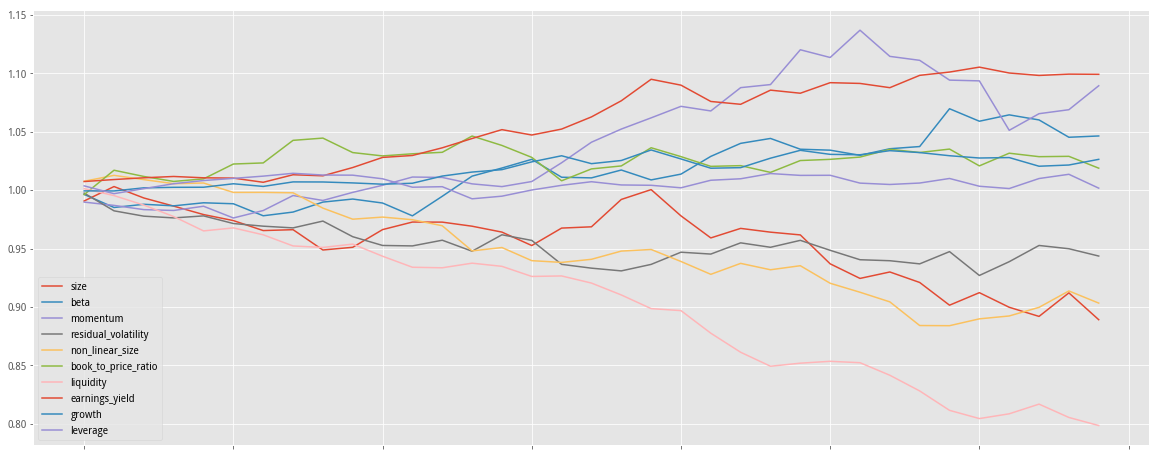

In [190]:
#风格收益
(factor_f_df.iloc[:,:10]+1).cumprod().plot(figsize=(20,8))

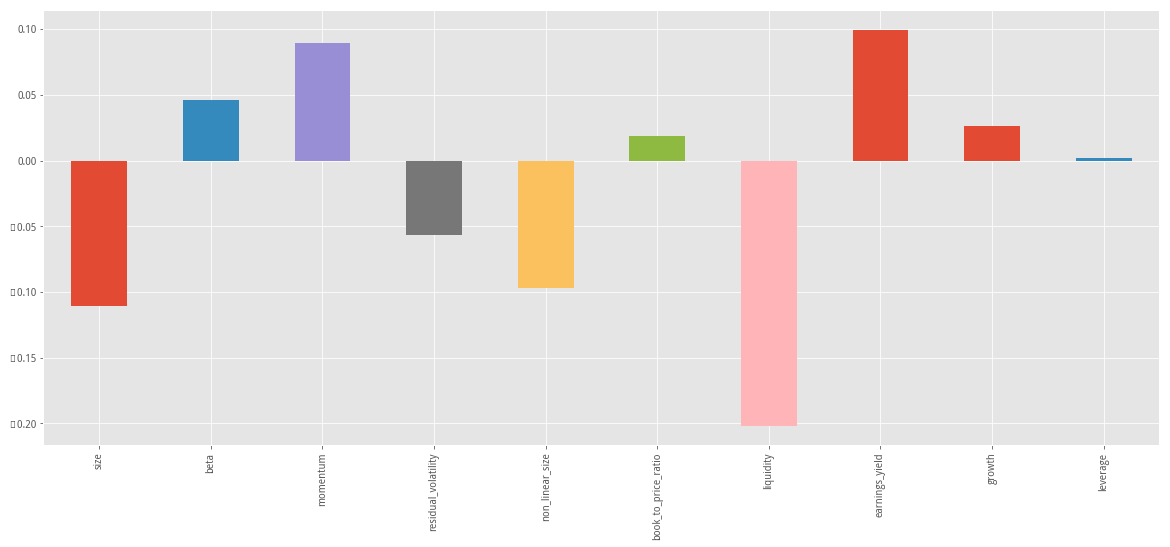

In [195]:
#纯净因子累计收益
((factor_f_df.iloc[:,:10]+1).cumprod()-1).iloc[-1,:].plot(kind='bar',figsize=(20,8))

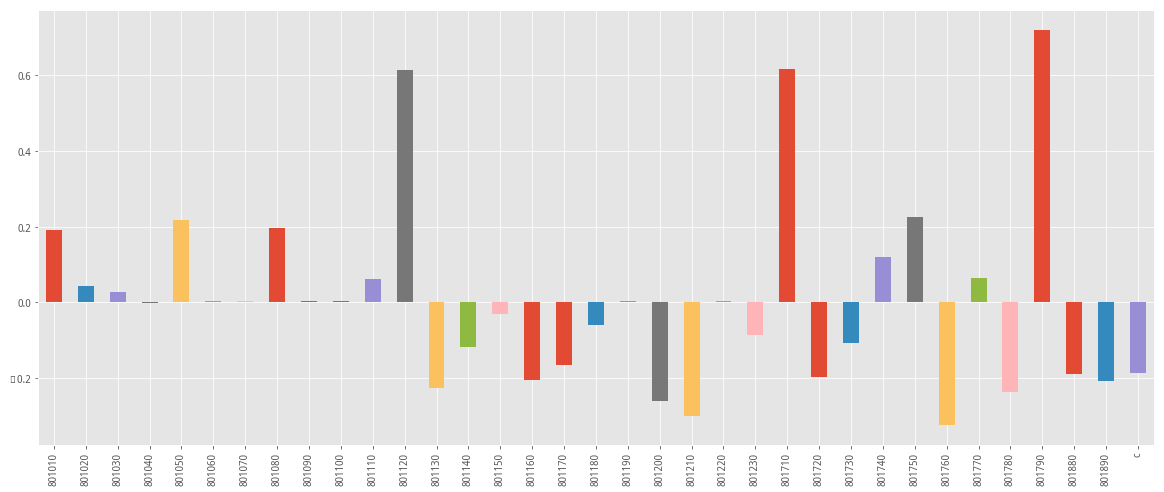

In [194]:
#行业累计收益
((factor_f_df.iloc[:,10:]+1).cumprod()-1).iloc[-1,:].plot(kind='bar',figsize=(20,8))

**组合收益归因**

In [11]:
#中证500选50只股票，进行收益分析
#进行因子值计算
factor_data_50_dict = {}
factor_name = ['size','beta','momentum','residual_volatility','non_linear_size','book_to_price_ratio','liquidity','earnings_yield','growth','leverage']
#循环时间列表获取原始因子数据组成dict
for end_date in date_list[:-1]:
    end_date=str(end_date)[:10]
    print('正在计算 {} 因子数据......'.format(end_date))
    stocks_list = get_index_stocks(index,date=end_date)
    pool_ = [stocks_list[i] for i in range(len(stocks_list)) if i%10==0]
    stocks_list = pool_
    #计算行业市值权重占比
    hy_df = get_industry_exposure(pool_,date=end_date).T
    hy_df['c'] = [1]*len(hy_df)
    x = factor_data_y_dict[end_date].loc[pool_,factor_name]
    df_pct = factor_data_y_dict[end_date].loc[pool_,['pct_']]
    #进行大X拼接
    X_ = pd.concat([x,hy_df,df_pct],axis=1)
    factor_data_50_dict[end_date] = X_
factor_data_50_dict[end_date].head(3)

正在计算 2016-06-01 因子数据......
正在计算 2016-07-01 因子数据......
正在计算 2016-08-01 因子数据......
正在计算 2016-09-01 因子数据......
正在计算 2016-10-10 因子数据......
正在计算 2016-11-01 因子数据......
正在计算 2016-12-01 因子数据......
正在计算 2017-01-03 因子数据......
正在计算 2017-02-03 因子数据......
正在计算 2017-03-01 因子数据......
正在计算 2017-04-05 因子数据......
正在计算 2017-05-02 因子数据......
正在计算 2017-06-01 因子数据......
正在计算 2017-07-03 因子数据......
正在计算 2017-08-01 因子数据......
正在计算 2017-09-01 因子数据......
正在计算 2017-10-09 因子数据......
正在计算 2017-11-01 因子数据......
正在计算 2017-12-01 因子数据......
正在计算 2018-01-02 因子数据......
正在计算 2018-02-01 因子数据......
正在计算 2018-03-01 因子数据......
正在计算 2018-04-02 因子数据......
正在计算 2018-05-02 因子数据......
正在计算 2018-06-01 因子数据......
正在计算 2018-07-02 因子数据......
正在计算 2018-08-01 因子数据......
正在计算 2018-09-03 因子数据......
正在计算 2018-10-08 因子数据......
正在计算 2018-11-01 因子数据......
正在计算 2018-12-03 因子数据......
正在计算 2019-01-02 因子数据......
正在计算 2019-02-01 因子数据......
正在计算 2019-03-01 因子数据......
正在计算 2019-04-01 因子数据......
正在计算 2019-05-06 因子数据......


,size,beta,momentum,residual_volatility,non_linear_size,book_to_price_ratio,liquidity,earnings_yield,growth,leverage,801010,801020,801030,801040,801050,801060,801070,801080,801090,801100,801110,801120,801130,801140,801150,801160,801170,801180,801190,801200,801210,801220,801230,801710,801720,801730,801740,801750,801760,801770,801780,801790,801880,801890,c,pct_
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000006.XSHE,-1.146586,0.332011,-0.019442,-1.374479,1.096001,0.843916,-0.449663,1.682004,0.024027,-0.168324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.021390
000049.XSHE,-1.707221,0.069808,-0.015941,-1.067066,0.804742,-0.913589,-0.468359,-0.224293,1.475875,0.208182,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.072490
000400.XSHE,-0.780721,0.059136,-0.482627,-0.455671,1.049237,0.938191,-0.164918,-0.106578,0.087378,-0.786844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-0.008929


In [17]:
factor_f_df = factor_f_df.T
mark = 1
for d in date_list[:20]:
    end_date = str(d)[:10]
    d1 = factor_data_50_dict[end_date]
    d2 = factor_f_df[end_date]
    y_df = pd.DataFrame()    
    y_df['pct_'] = d1['pct_']
    y_df['p_pct_']= np.dot(d1.iloc[:,:-1],d2)
    if mark == 1:
        y_df_ = y_df
        mark = 0
    else:
        y_df_ = pd.concat([y_df_,y_df],axis=0)
y_df_.head(3)

,pct_,p_pct_
code,,
000006.XSHE,0.000000,0.038088
000078.XSHE,-0.042328,0.008007
000511.XSHE,NaN,0.053393


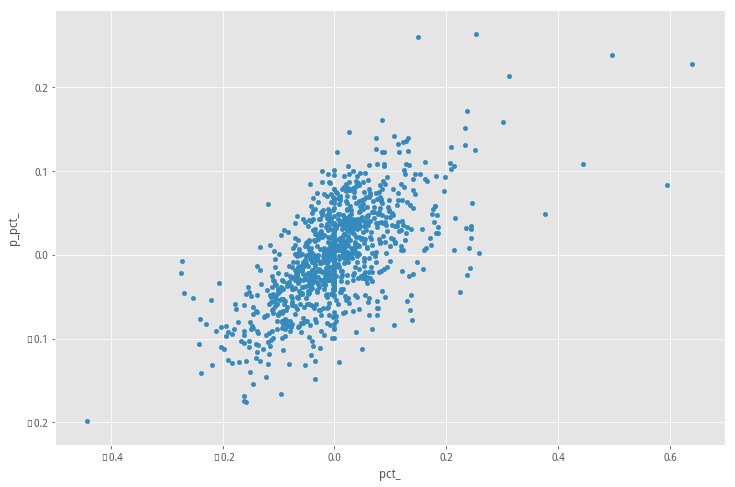

In [18]:
y_df_.plot(x='pct_', y='p_pct_', kind='scatter',figsize=(12,8))

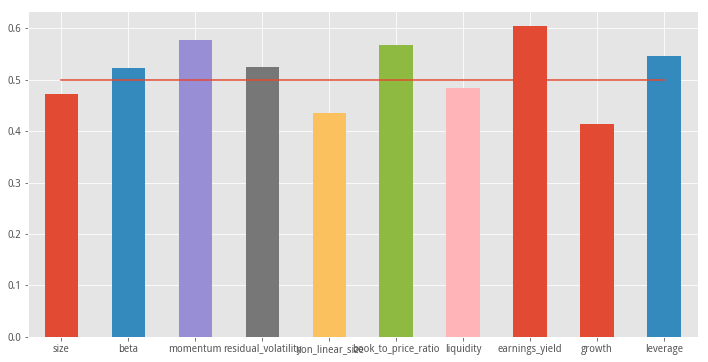

In [20]:
#以20190506为例,检查因子暴露度百分位
end_date = '2019-05-06'
d3 = factor_data_y_dict[end_date]
d1 = factor_data_50_dict[end_date].dropna(axis=0)
d_mean = d1.mean(axis=0)[:10]
d4 = pd.concat([d3.iloc[:,:10].T,d_mean],axis=1)
d4['mid'] = [0.5]*len(d4)
(d4.rank(axis=1)[0]/500).plot(kind='bar',figsize=(12,6))
d4['mid'].plot()
plt.show()

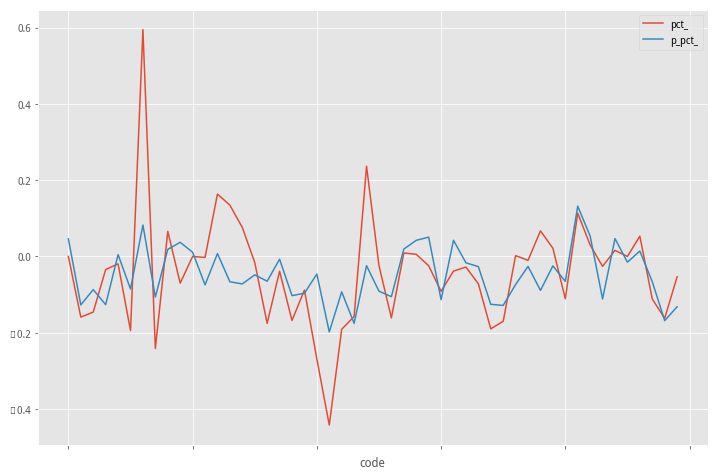

In [21]:
y_df.plot(figsize=(12,8))